# Redes Neurais Convolucionais (CNN)

## Introdução

Redes neurais convolucionais são um um tipo de rede neural, comumente utilizadas para processamento de imagens.
A grande vantagem por trás desse tipo de rede é que ela tenta tirar proveito de estruturas espaciais, o que as torna
particularmente bem adaptadas para classificar imagens.

## Definição

Uma Rede Neural Convolucional (ConvNet / Convolutional Neural Network / CNN) é um algoritmo de Aprendizado Profundo que pode captar uma imagem de entrada, atribuir importância (pesos e vieses que podem ser aprendidos) a vários aspectos / objetos da imagem e ser capaz de diferenciar um do outro.
O pré-processamento exigido em uma ConvNet é muito menor em comparação com outros algoritmos de classificação.
Enquanto nos métodos primitivos os filtros são feitos à mão, com treinamento suficiente, as ConvNets têm a capacidade de aprender esses filtros / características.

A arquitetura de uma ConvNet é análoga àquela do padrão de conectividade de neurônios no cérebro humano e foi inspirada na organização do Visual Cortex. Os neurônios individuais respondem a estímulos apenas em uma região restrita do campo visual conhecida como Campo Receptivo. Uma coleção desses campos se sobrepõe para cobrir toda a área visual.


### Por que usar ConvNets e não rede feed-forward?

Uma imagem não é nada além de uma matriz de valores de pixels, certo? Então, por que não apenas achatar a imagem (por exemplo, converter uma matriz 3×3 em um vetor 9×1. Se a imagem é uma matriz, nenhum problema em converter em uma vetor) e alimentá-lo para um Perceptron Multi-Layer para fins de classificação? Na verdade não.

Em casos de imagens binárias extremamente básicas, o método pode mostrar uma pontuação de precisão média durante a previsão de classes, mas teria pouca ou nenhuma precisão quando se trata de imagens complexas com dependências de pixel por toda parte.

Uma ConvNet é capaz de capturar com sucesso as dependências espaciais e temporais em uma imagem através da aplicação de filtros relevantes.
A arquitetura executa um melhor ajuste ao conjunto de dados da imagem devido à redução no número de parâmetros envolvidos e à capacidade de reutilização dos pesos. Em outras palavras, a rede pode ser treinada para entender melhor a sofisticação da imagem.


# Representação de Imagens Digitais

## Imagem Monocromática

Uma imagem monocromática é uma função bidimensional da intensidade  da luz $f(x, y)$, onde $x$ e $y$ denotam as coordenadas espaciais (largura e  altura) e o valor $f$, em qualquer ponto $(x, y)$ é proporcional ao brilho (ou nível de cinza) da imagem naquela seção.

 <div>
    <center>
        <img src="docs/_static/imagem_monocromatica.png" width="600">
    </center>
</div>

A intensidade da luz pode ser modelada como:

$$f(x, y)=i(x, y) \cdot r(x, y)$$

Onde:

* **Iluminação do ambiente:** $i\rightarrow 0 \lt i(x,y) \lt \infty$
* **Refletância dos objetos:** $r\rightarrow 0 \le r(x,y) \le 1$

----

### Amostragem

<div>
    <center>
        <img src="docs/_static/amostragem.png" width="900">
    </center>
</div>

* Amostrar é realizar a medição (normalmente uniforme) dos níveis de cinza ao longo de uma imagem.
* A amostragem terá como resultado uma matriz $M \times N$ de  amostras da imagem, onde cada elemento é chamado píxel.
* A dimensão de um píxel ao longo do eixo $x$, ou do eixo $y$, está relacionada com o espaço físico entre as amostras.

----

### Resolução Espacial

* A resolução espacial é determinada pelo <b><font color="green">número de píxeis por área da imagem</font></b>, ou seja, pela dimensão do píxel na imagem.
* <b><font color="green">Quanto mais píxeis uma imagem tiver (ou quanto menor o tamanho do píxel), maior é a sua resolução e melhor a sua qualidade.
* A resolução espacial de uma imagem influi na qualidade da percepção que se tem da mesma.</font></b>

As figuras abaixo apresentam a mesma imagem, representadas em diversas resoluções:

<div>
    <center>
        <img src="docs/_static/resolucao_espacial.png" width="900">
    </center>
</div>

----

### Quantização

Quantização é a representação do valor medido de um píxel aproximado por um inteiro.

<div>
    <center>
        <img src="docs/_static/quantizacao.png" width="800">
    </center>
</div>

----

### Profundidade da Imagem

* Quantidade $L$ de níveis de quantização da função $f(x, y)$. Em outras palavras, representa a quantidade de tons que podem ser representados por cada píxel.
* Em geral, $L$ é representado por uma potência de 2 ($256, 1024, 4096$).
* Se$L=256$, significa que cada píxel pode ter associado um  valor de cinza entre 0 e 255, que requer no máximo 8 bits para  ser armazenado na memória do computador. Diz-se então que a profundidade da imagem é 8 bits por píxel (ou 1 ‘byte’ por píxel).


<div>
    <center>
        <img src="docs/_static/grayscale.png" width="600">
    </center>
</div>


:::{hint}

1 bit é capaz de representar dois estados (0, ou 1), logo 8 bits em sequência são capazes de representar $2^8$ possíveis valores, que por sua vez,
equivalem a um total de 256 possíveis combinações.

<div>
    <center>
        <img src="docs/_static/8bits.png" width="500">
    </center>
</div>

:::


----

### Imagem Colorida

Uma representação comum para uma imagem colorida utiliza três bandas: <b><font color="red">R</font>, <font color="green">G</font>, e <font color="blue">B</font></b>, com uma profundidade de 3 bytes por píxel.

<div>
    <center>
        <img src="docs/_static/imagem-RGB.png" width="700">
    </center>
</div>

# Convolução

Convolução é uma operação matemática entre duas funções $f$ e $g$, produzindo uma nova função, que pode ser interpretada como uma função modificada de $f$.

No processamento de imagens, onde a imagem é definida como uma função bidimensional (da posição em relação aos eixos $x$ e $y$ de cada píxel), a convolução é útil para <b>detecção de bordas, suavização de imagem, extração de atributos</b>, entre outras aplicações.

## Matriz de Convolução

Um grande número de filtros, usa a matriz de convolução internamente para aplicação de transformações, tais como:

* Desfocagem.
* Nitidez.
* Mapa de relevo.
* etc.

### Mas o que é uma matriz de convolução?

Convolução é o tratamento de uma matriz por outra chamada “núcleo”, ou como, é mais comumente conhecido: <b>“kernel”.</b>

O filtro de Matriz de Convolução usa uma matriz primária, sendo esta, a imagem a ser tratada.
Essa imagem é então tratada como uma coleção bi-dimensional de píxeis em coordenadas retangulares.
O núcleo a ser usado vai depender do efeito desejado.


# Redes Convolutivas (CNNs)

### Glossário de Termos

| **Termo**     | **Descrição**                            |
|:-------------:|:----------------------------------------:|
| DNN           | **D**eep **N**eural **N**etwork          |
| CNN           | **C**onvolutional **N**eural **N**etwork |


As CNNs são arquiteturas de redes neurais profundas com diferentes tipos de camadas.
Dentre as camadas mais comum deste tipo de rede neural temos as camadas de:
<b><font color="green">convolução, max-pooling e softmax.</font></b>

## Arquitetura Básica

Uma CNN é composta por uma sequência de camadas. Além da camada de entrada, sendo normalmente composta por uma imagem com largura, altura e profundidade (RGB), exitem três camadas principais: camada convolucional, camada de pooling e uma camada totalmente conectada (fully connected).

Além disso, após uma camada de convolução é comum existir também uma camada de ativação (normalmente configurado com uma função ReLu).
Essas camadas, quando colocadas em sequência (ou empilhadas), formam uma arquitetura de uma CNN, como ilustrado abaixo.

 <div>
    <center>
        <img src="docs/_static/conv-arquitecture.jpeg" width="900">
    </center>
</div>

## Camada Convoluicional

A camada convolucional é a camada mais importante da rede. Nela é realizada a parte mais pesada do processamento computacional.

Esta camada é composta por um conjunto de filtros (ou “kernels”), capazes de aprender a identificar certas características das imagens ao longo do treino. Os filtros são matrizes pequenas (de tamanho $5\times 5\times \times3$, por exemplo) formadas por um conjunto de valores reais que a são ajustados ao longo do aprendizado.
A principal ideia por trás desses filtros, é que ao final do treino, eles devem ser capazes de gerar um mapa de características sobre as imagens.
Estes mapas indicam regiões onde características específicas em relação ao filtro, são encontradas na entrada.
Os valores reais dos filtros se alteram ao longo do treinamento (assim como os pesos de uma rede neural tradicional) fazendo com que a rede aprenda a identificar regiões significantes para extrair características do conjunto de dados.

A figura abaixo ilustra o processo da convolução, descrito acima, onde cada neurônio se encarrega de cada parte da matriz, buscando extrair características em múltiplos níveis de abstração, melhorando as análises ao ter múltiplas variáveis.


 <div>
    <center>
        <img src="docs/_static/convolucao.png" width="900">
    </center>
</div>

### Kernel

Os Kernels são parâmetros ajustáveis do modelo, eles devem aprender a modelar
relações entre píxeis vizinhos, independente da posição em que esses píxeis se
encontram na imagem.

------

# Cat Vs. Dogs

## Objetivo

Classificar imagens de cachorros e gatos.

## Fonte dos Dados

Para treinar o modelo, iremos utilizar uma base contendo 25.000 imagens pré-classificadas. A base está disponível no Kaggle e você pode obter maiores informações acessando o seguinte link: [dogs-vs-cats](https://www.kaggle.com/competitions/dogs-vs-cats/data).

## Modelo Classificação

O nosso modelo deverá ser capaz de classificar as 25.000 imagens, sendo 1 = cachorro e, 0 = gato.
Sendo assim, o problema que iremos resolver trata-se de um problema de **classificação binário.**


## Importando Pacotes Necessários

In [6]:
from __future__ import annotations

import sys
import os
import pathlib
import datetime

import pandas as pd
from typing import Any

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential

from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Configurando Variáveis do Notebook

Configurando variáveis que serão utilizadas ao longo da execução do notebook.

In [3]:
IMAGE_FOLDER_PATH = r'./data/dogs-vs-cats/train'

FILE_NAMES = os.listdir(IMAGE_FOLDER_PATH)
HEIGHT, WIDTH = 150, 150
FILE_NAMES[0:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [7]:
data_dir = pathlib.Path(IMAGE_FOLDER_PATH)
train_cats_dir = list(data_dir.glob(f'**/cat*.jpg'))
train_dogs_dir = list(data_dir.glob(f'**/dog*.jpg'))
full_paths = list(data_dir.glob(f'**/*.jpg'))
train_cats_dir[:5]

[PosixPath('data/dogs-vs-cats/train/cat.5077.jpg'),
 PosixPath('data/dogs-vs-cats/train/cat.2718.jpg'),
 PosixPath('data/dogs-vs-cats/train/cat.10151.jpg'),
 PosixPath('data/dogs-vs-cats/train/cat.3406.jpg'),
 PosixPath('data/dogs-vs-cats/train/cat.4369.jpg')]

In [8]:
dataset = pd.DataFrame(
    {
        'image_path': train_dogs_dir + train_cats_dir,
        'target': ['dog'] * len(train_dogs_dir) + ['cat'] * len(train_cats_dir)
    }
)
dataset.head()

,image_path,target
0,data/dogs-vs-cats/train/dog.8011.jpg,dog
1,data/dogs-vs-cats/train/dog.7322.jpg,dog
2,data/dogs-vs-cats/train/dog.1753.jpg,dog
3,data/dogs-vs-cats/train/dog.5535.jpg,dog
4,data/dogs-vs-cats/train/dog.3144.jpg,dog


In [9]:
dataset['target'].value_counts()

dog    12500
cat    12500
Name: target, dtype: int64

## Visualizando Base de Imagens

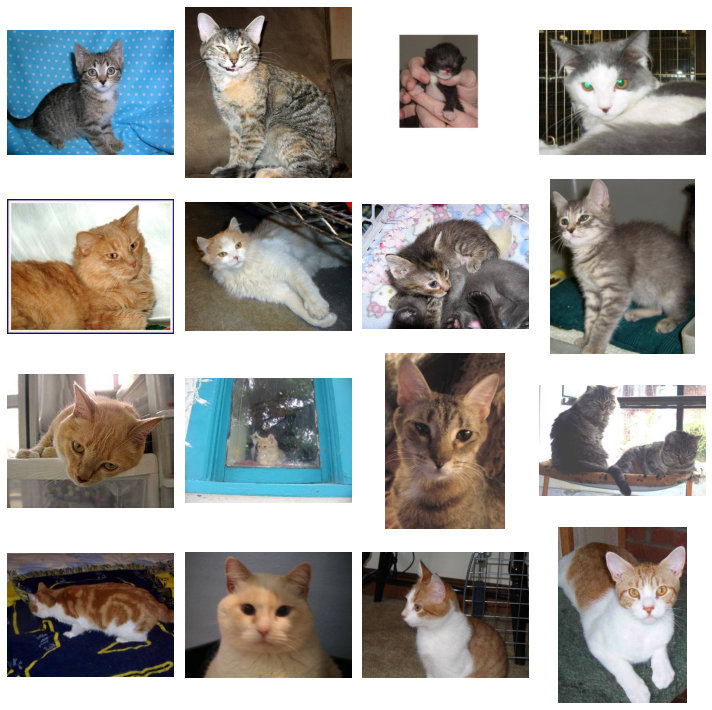

In [10]:
rows, cols = 4, 4
axes = []

fig = plt.figure(figsize=(10, 10))

for i, a in enumerate(range(rows * cols)):
    b = mpimg.imread(train_cats_dir[i])
    sp = fig.add_subplot(rows, cols, a+1)
    axes.append(sp)
    sp.axis('off')
    plt.imshow(b)

fig.tight_layout()
plt.show()


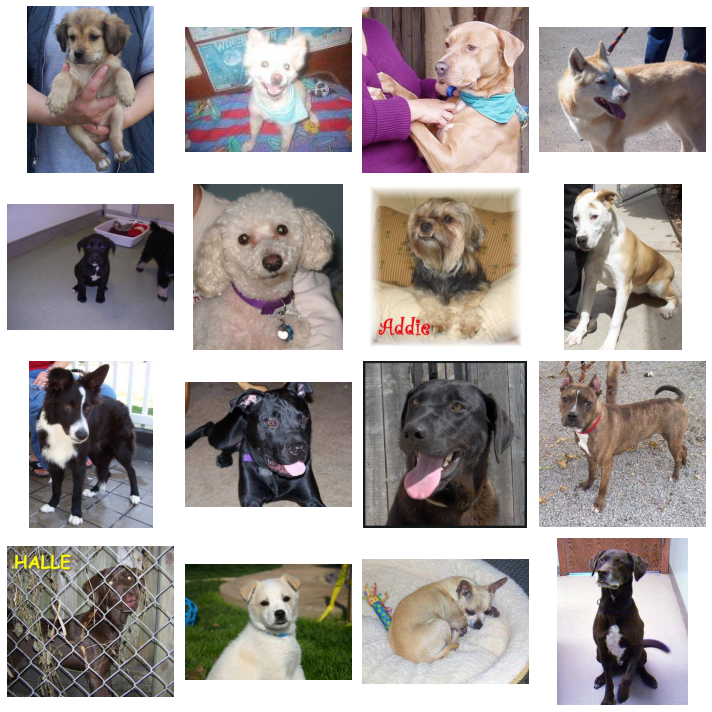

In [11]:
rows, cols = 4, 4
axes = []

fig = plt.figure(figsize=(10, 10))

for i, a in enumerate(range(rows * cols)):
    b = mpimg.imread(train_dogs_dir[i])
    sp = fig.add_subplot(rows, cols, a+1)
    axes.append(sp)
    sp.axis('off')
    plt.imshow(b)

fig.tight_layout()
plt.show()

## Preprocessamento

Operações a serem realizadas:

- Normalizar valores de cada píxel, de 0 a 255 para valores entre 0 e 1.


In [12]:
dataset_train, dataset_test = train_test_split(
    dataset.astype({col: str for col in dataset.columns}), test_size=0.2
)

In [13]:
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1.0 / 255,
    shear_range = 0.1,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
)


train_datagenerator = train_datagen.flow_from_dataframe(
    dataframe=dataset_train,
    x_col = "image_path",
    y_col = "target",
    target_size = (WIDTH, HEIGHT),
    class_mode = "binary",
    batch_size = 150,
)

Found 20000 validated image filenames belonging to 2 classes.


In [14]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_datagenerator = test_datagen.flow_from_dataframe(
    dataframe=dataset_test,
    x_col="image_path",
    y_col="target",
    target_size=(WIDTH, HEIGHT),
    class_mode="binary",
    batch_size=150,
)

Found 5000 validated image filenames belonging to 2 classes.


## Criando Rede Neural Convolucional

In [24]:
def create_model():

    model = tf.keras.models.Sequential(
        [
            tf.keras.layers.Conv2D(
                16, (3, 3), activation="relu", input_shape=(150, 150, 3)
            ),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
            tf.keras.layers.MaxPooling2D(2, 2),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(512, activation="relu"),
            tf.keras.layers.Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

    return model

In [25]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

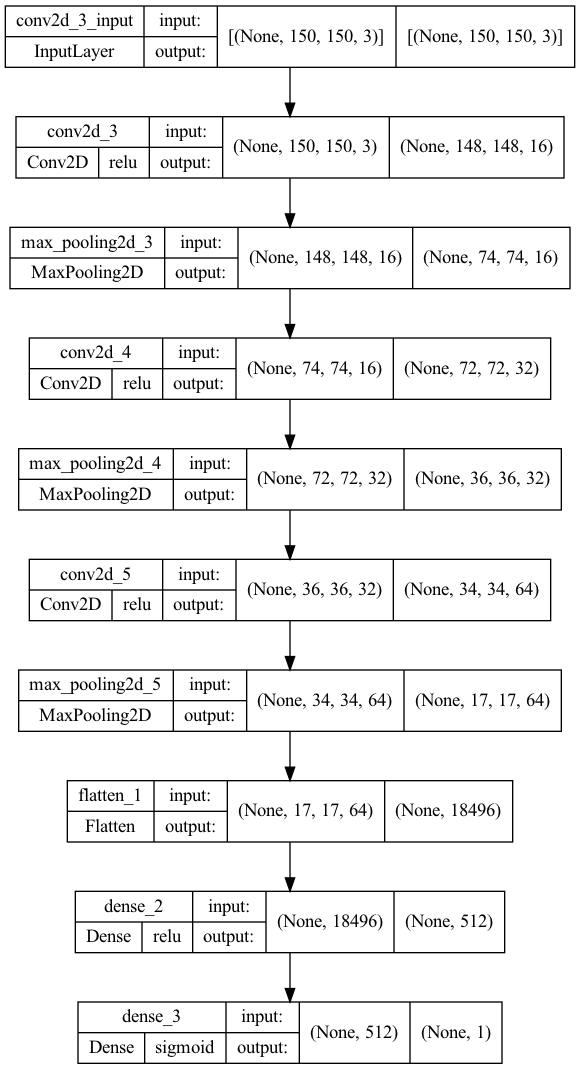

In [26]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir='TB', show_layer_activations=True)

In [28]:
class EarlyStopCallback(tf.keras.callbacks.Callback):
    """
    Callback para parar o treinamento do modelo quando a acurácia de validação
    atingir um valor mínimo.

    Attributes
    ----------
    _min_accuracy : float
        Valor mínimo de acurácia de validação para parar o treinamento.

    Methods
    -------
    on_epoch_end(epoch: int, logs: dict | None = None)
        Para o treinamento do modelo quando a acurácia de validação atingir um
        valor mínimo.
    """
    _min_accuracy: float = 0.9

    @property
    def min_accuracy(self) -> float:
        return self._min_accuracy

    @min_accuracy.setter
    def min_accuracy(self, min_acc: float):
        if isinstance(min_acc, float) and 0 < min_acc < 1:
            self._min_accuracy = min_acc
        else:
            print(
                f'O valor {min_acc} informado não é um número entre 0 e 1.'
                'Parâmetro aceita apenas valores dentro deste range. '
                f'Utilizando valor atual igual a {self.min_accuracy}.'
            )

    def __init__(self, **kwargs: Any):
        for kwarg, value in kwargs.items():
            if hasattr(self, kwarg):
                setattr(self, kwarg, value)

    def on_epoch_end(self, epoch: int, logs: dict | None = None):
        if not isinstance(logs, dict):
            logs = {}
        if logs.get('val_accuracy') >= self.min_accuracy:
            self.model.stop_training = True


### Callbacks

Callbacks são operações programadas para serem executadas antes, ou após um evento acontecer.
O termo se refere à um tipo de arquitetura de código, que permite que as "ações" definidas como callbacks
existam sem o evento que faz com que elas sejam executadas precisar saber da existência delas.

**Por exemplo:**

Um código que possua um callback, que é executado toda vez que um output é gerado não precisa que o gerador desse output saiba
da existência desse callback.


No nosso exemplo, iremos definir 2 callbacks:

* `EarlyStopCallback`: irá interromper o treino, caso nós cheguemos à uma acurácia de no mínimo 90% ao final de uma das épocas do treino.
* `tensorboard_callback`: salva métricas do treino que podemos analisar utilizando a ferramenta [TensorBoard](https://www.tensorflow.org/tensorboard). A imagem abaixo, mostra o resultado do treino desse modelo dentro da ferramenta.


 <div>
    <center>
        <img src="docs/_static/tensorboard.png" width="1200">
    </center>
</div>

In [29]:
callback = EarlyStopCallback()
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


history = model.fit(
    train_datagenerator,
    epochs=50,
    validation_data=test_datagenerator,
    validation_steps=dataset_test.shape[0] / 150,
    steps_per_epoch=dataset_train.shape[0] / 150,
    callbacks=[callback, tensorboard_callback],
)

Epoch 1/50
133/133 [==============================] - 219s 2s/step - loss: 0.6754 - accuracy: 0.5828 - val_loss: 0.5796 - val_accuracy: 0.6986
Epoch 2/50
133/133 [==============================] - 215s 2s/step - loss: 0.5655 - accuracy: 0.7054 - val_loss: 0.5711 - val_accuracy: 0.7012
Epoch 3/50
133/133 [==============================] - 220s 2s/step - loss: 0.5229 - accuracy: 0.7362 - val_loss: 0.4856 - val_accuracy: 0.7642
Epoch 4/50
133/133 [==============================] - 218s 2s/step - loss: 0.4776 - accuracy: 0.7699 - val_loss: 0.4381 - val_accuracy: 0.8004
Epoch 5/50
133/133 [==============================] - 205s 2s/step - loss: 0.4491 - accuracy: 0.7890 - val_loss: 0.4322 - val_accuracy: 0.8072
Epoch 6/50
133/133 [==============================] - 219s 2s/step - loss: 0.4393 - accuracy: 0.7976 - val_loss: 0.4032 - val_accuracy: 0.8198
Epoch 7/50
133/133 [==============================] - 201s 2s/step - loss: 0.4273 - accuracy: 0.8003 - val_loss: 0.4171 - val_accuracy: 0.8022

## Visualizando Curva de Aprendizado

O código abaixo permite visualizarmos a evolução do modelo ao longo do treino.

Nele, é possível observar quatro curvas referentes às seguintes métricas:

- **accuracy:** acurácia do modelo durante o treino.
- **val_accuracy:** acurácia do modelo durante a validação.
- **loss:** perdas (acho que é isso em português). É uma métrica que avalia a frequencia com que o modelo comete um erro. No nosso caso em específico, essa medida avalia a taxa de erros que o modelo comete na classificação de ambas as nossas labels (cãos e gatos).
- **val_loss:** Avalia as perdas para a etapa de validação.

:::{tip}

Em geral, é de se esperar que tanto o "loss" quanto "val_loss" diminuam com a evolução do treinamento.
Caso os seus valores permaneçam constantes durante as épocas de treino, isso indica que o modelo não está
conseguindo aprender (ou aprender mais, caso o resultado já esteja razoável).

Outro comportamento normal, que é importante mencionar, é o que a acurácia e loss aferidos durante a etapa de treino em geral são
sempre um pouco maiores que os valores obtidos durante as etapas de validação e teste. Isto se deve ao fato do nosso modelo estar tentando prever
os casos presentes no dataset de validação e teste pela primeira vez e nunca ter treinado em cima desses dados.
Pensa nas questões de um livro vs. questões de prova. Por mais que o conteúdo seja parecido, em geral professores evitam
colocar exatamente o mesmo enunciado na prova. Se o seu modelo estiver indo melhor na etapa de validação que no treino, é um forte indicativo de que
existem vazamentos de dados entre as etapas de validação e treino.

:::

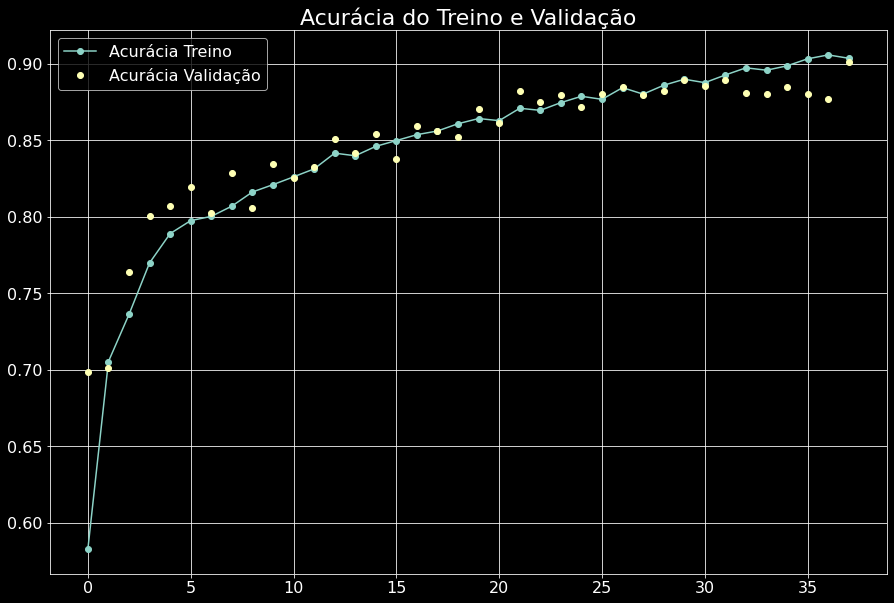

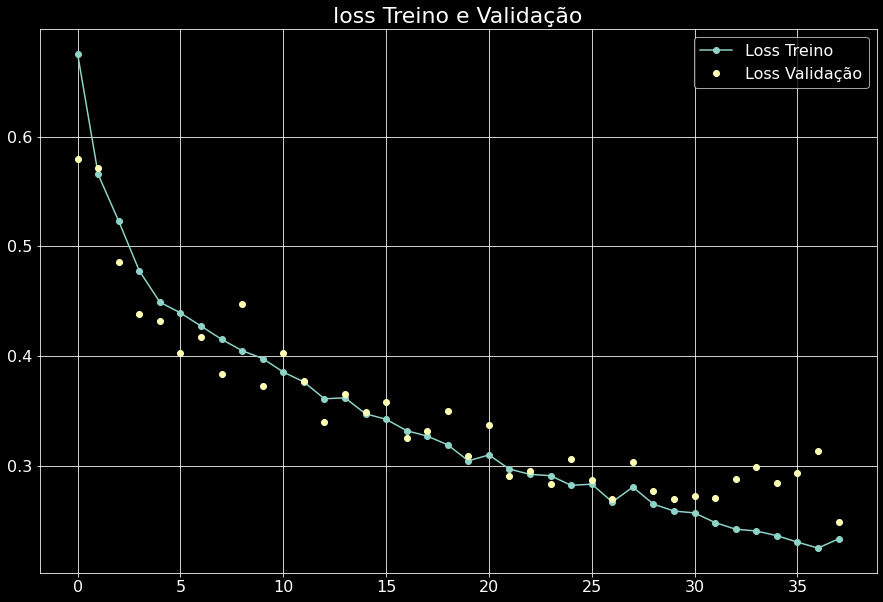

In [52]:
plt.style.use('dark_background')
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.figure(figsize=(15, 10))

plt.plot(epochs, acc, 'o-', label='Acurácia Treino')
plt.plot(epochs, val_acc, 'o', label='Acurácia Validação', )
plt.title('Acurácia do Treino e Validação', fontsize=22)
plt.legend(fontsize=16)
plt.grid()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.figure(figsize=(15, 10))
plt.plot(epochs, loss, 'o-', label='Loss Treino')
plt.plot(epochs, val_loss, 'o', label='Loss Validação', linewidth=4)
plt.title('loss Treino e Validação', fontsize=22)
plt.legend(fontsize=16)
plt.grid(which='both')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()